In [19]:
import numpy as np
import pandas as pd

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
import string

In [21]:
stop_words = stopwords.words('english')

In [22]:
from sklearn.metrics import classification_report, confusion_matrix,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [23]:
yelp = pd.read_csv('/Users/user/Desktop/Progress/1/Udemy - Python for Data Science and Machine Learning/24. Natural Language Processing/20-Natural-Language-Processing/yelp.csv')

In [24]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [25]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [26]:
yelp['text'].describe()

count             10000
unique             9998
top       Great service
freq                  2
Name: text, dtype: object

In [27]:
def tokenizer(mess):
    removed = [i for i in mess if i not in string.punctuation]
    removed = ''.join(removed)
    stops = [i for i in removed.split() if i.lower() not in stop_words]
    stops = ' '.join(stops)
    return stops

In [28]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [29]:
yelp['length'] = yelp['text'].apply(len)
yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76


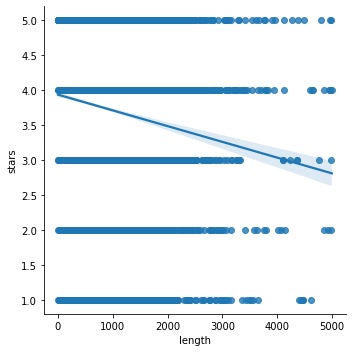

In [30]:
sns.lmplot(data=yelp,x='length',y='stars')

In [31]:
yelp['cleaned_text'] = yelp['text'].apply(tokenizer)
yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,cleaned_text
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,wife took birthday breakfast excellent weather...
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,idea people give bad reviews place goes show p...
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,love gyro plate Rice good also dig candy selec...


In [32]:
yelp['type'].nunique()

1

In [33]:
yelp_new = yelp.drop(['business_id','date','review_id','type','user_id'],inplace=False,axis=1)

In [34]:
yelp_new.head(2)

,stars,text,cool,useful,funny,length,cleaned_text
0,5,My wife took me here on my birthday for breakf...,2,5,0,889,wife took birthday breakfast excellent weather...
1,5,I have no idea why some people give bad review...,0,0,0,1345,idea people give bad reviews place goes show p...


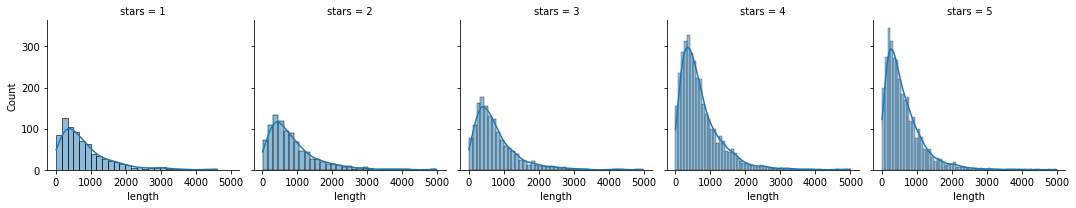

In [35]:
grid = sns.FacetGrid(data=yelp_new,col='stars')
grid.map(sns.histplot,'length',kde=True)

<AxesSubplot:xlabel='stars', ylabel='length'>

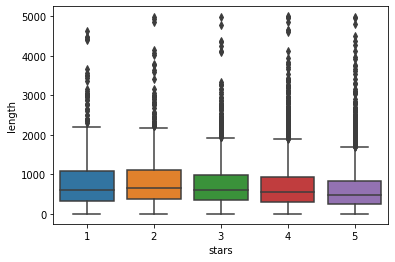

In [36]:
sns.boxplot(data=yelp_new,x='stars',y='length')

<AxesSubplot:xlabel='stars', ylabel='count'>

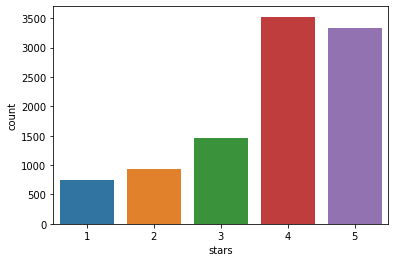

In [37]:
sns.countplot(yelp_new['stars'])

In [38]:
by_stars = yelp_new.groupby('stars').mean()
by_stars

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


<AxesSubplot:>

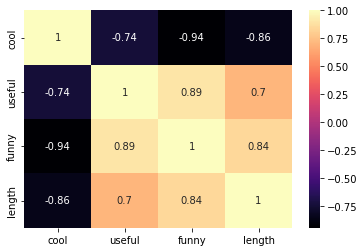

In [39]:
sns.heatmap(by_stars.corr(),annot=True,cmap='magma')

In [40]:
yelp_main = yelp_new[(yelp_new['stars']==1)|(yelp_new['stars']==5)]

In [41]:
yelp_main.head(2)

,stars,text,cool,useful,funny,length,cleaned_text
0,5,My wife took me here on my birthday for breakf...,2,5,0,889,wife took birthday breakfast excellent weather...
1,5,I have no idea why some people give bad review...,0,0,0,1345,idea people give bad reviews place goes show p...


In [42]:
model = pd.DataFrame(columns=['Score'])
models = [LogisticRegression(),RandomForestClassifier(),MultinomialNB(),SVC(),DecisionTreeClassifier()]
for j,i in enumerate(models):
    pipeline = Pipeline([('first',CountVectorizer()),('second',i)])
    txt_train,txt_test,label_train,label_test = train_test_split(yelp_main['cleaned_text'],yelp_main['stars'],test_size=0.3)
    pipeline.fit(txt_train,label_train)
    score = pipeline.score(txt_test,label_test)
    model.loc[str(models[j])[:str(models[j]).index('(')]] = score*100
model.sort_values(by='Score',ascending=False)

,Score
LogisticRegression,91.924959
MultinomialNB,91.517129
RandomForestClassifier,89.151713
SVC,87.683524
DecisionTreeClassifier,85.399674
